Now the input data is pre-processed data

Data is imbalanced

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load dataset
input_path = "../data/clean_df.csv"
df = pd.read_csv(input_path)

In [12]:
# check basic information of datasets
df.dtypes # data type

Unnamed: 0             int64
age                  float64
education              int64
default                int64
housing                int64
loan                   int64
campaign             float64
pdays                float64
previous             float64
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
y                      int64
job_admin.             int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
marital_divorced       int64
marital_married        int64
marital_single         int64
contact_cellular       int64
contact_telephone      int64
month_apr              int64
month_aug              int64
month_dec              int64
month_jul     

In [13]:
df.describe() # statistic information of numeric variables

,Unnamed: 0,age,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,40787.000000,4.078700e+04,40787.000000,40787.000000,40787.000000,40787.000000,4.078700e+04,4.078700e+04,4.078700e+04,4.078700e+04,...,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000
mean,20393.000000,6.633302e-16,5.236570,0.000074,0.548214,0.151592,-4.129500e-15,3.210505e-14,-1.178318e-13,-3.690077e-15,...,0.013264,0.333905,0.100203,0.017334,0.013779,0.190723,0.206438,0.209135,0.196288,0.197416
std,11774.337051,1.000012e+00,1.643169,0.008576,0.497676,0.358630,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,0.114405,0.471612,0.300275,0.130514,0.116573,0.392876,0.404754,0.406696,0.397194,0.398054
min,0.000000,-2.209071e+00,1.000000,0.000000,0.000000,0.000000,-5.657776e-01,-5.167854e+00,-3.493406e-01,-2.216729e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10196.500000,-7.670443e-01,4.000000,0.000000,0.000000,0.000000,-5.657776e-01,1.947198e-01,-3.493406e-01,-1.197694e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20393.000000,-1.902337e-01,5.000000,0.000000,1.000000,0.000000,-2.045150e-01,1.947198e-01,-3.493406e-01,6.493061e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30589.500000,6.749821e-01,7.000000,0.000000,1.000000,0.000000,1.567476e-01,1.947198e-01,-3.493406e-01,8.403751e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40786.000000,5.577872e+00,7.000000,1.000000,1.000000,1.000000,1.930367e+01,1.947198e-01,1.379616e+01,8.403751e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.head() # first 5 records

,Unnamed: 0,age,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,1.540198,2,0,0,0,-0.565778,0.19472,-0.349341,0.649306,...,0,1,0,0,0,0,1,0,0,0
1,1,1.636333,5,0,0,0,-0.565778,0.19472,-0.349341,0.649306,...,0,1,0,0,0,0,1,0,0,0
2,2,-0.286369,5,0,1,0,-0.565778,0.19472,-0.349341,0.649306,...,0,1,0,0,0,0,1,0,0,0
3,3,0.002036,3,0,0,0,-0.565778,0.19472,-0.349341,0.649306,...,0,1,0,0,0,0,1,0,0,0
4,4,1.540198,5,0,0,1,-0.565778,0.19472,-0.349341,0.649306,...,0,1,0,0,0,0,1,0,0,0


In [6]:
df.shape # print the dimensions of the dataframe

(40787, 46)

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # = 2.1.0

Matplotlib version:  2.1.0


In [26]:
d = [pd.value_counts(df['y'])[1], pd.value_counts(df['y'])[0]]
index = ['Yes', 'No']
df_y = pd.DataFrame(data={'y':d}, index=index)
type(df_y)  # df_y is a Dataframe
df_y

,y
Yes,4594
No,36193


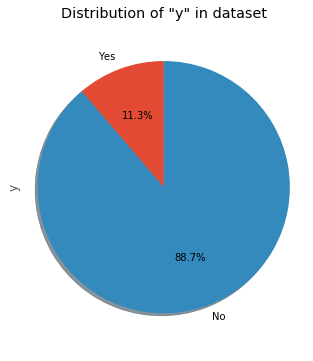

In [33]:
df_y['y'].plot(kind='pie', figsize=(5, 6),
               autopct='%1.1f%%', # add in percentages
               startangle=90,     # start angle 90°
               shadow=True,       # add shadow      
               )

plt.title('Distribution of "y" in dataset')
plt.axis('equal')     # Sets the pie chart to look like a circle.

plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn import metrics
print('Sklearn version: ', sklearn.__version__) # = 0.19.1

Sklearn version:  0.19.1


In [38]:
X = df[df.columns.difference(['y'])]  # features
Y = df['y']                           # target

# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify = Y, random_state = 0)

print("X_train = " + str(X_train.shape))
print("X_test = " + str(X_test.shape))
print("Y_train = " + str(Y_train.shape))
print("Y_test = " + str(Y_test.shape))

X_train = (27327, 45)
X_test = (13460, 45)
Y_train = (27327,)
Y_test = (13460,)


In [81]:
def plot_roc(fpr, tpr):  
    plt.figure(num=None, figsize=(6, 5))  
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
    plt.fill_between(fpr, tpr, alpha=0.2)  
    #plt.grid(True, linestyle='-', color='0.75')      
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)  
    plt.legend(loc="upper left")
    plt.show()

def plot_prediction_recall(precision, recall):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

import itertools
    
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

Accuracy: 0.89
F1-score: ['0.94', '0.35']
AUC: 0.76


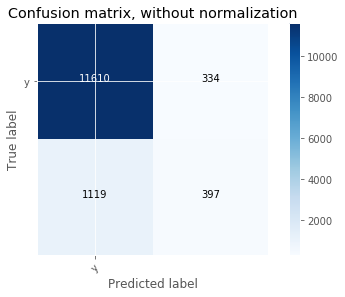

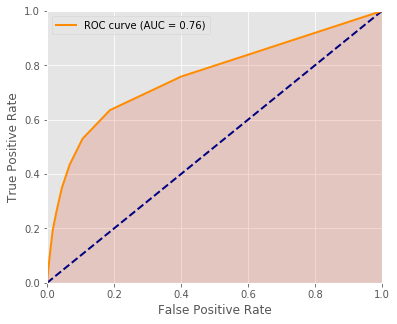

Average precision-recall score: 0.36


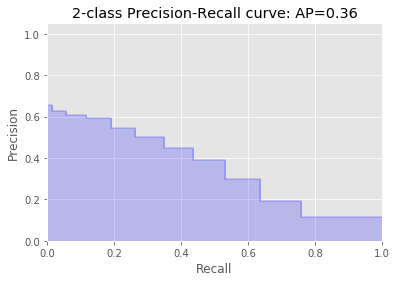

In [89]:
### testing different classifiers and doing model evaluation

# RandomForest
rf_classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", class_weight="balanced") # set class_weight to avoid unbalanced problem
rf_classifier = rf_classifier.fit(X_train, Y_train)  # training

Y_predict = rf_classifier.predict(X_test) # predict
Y_predict_prob = rf_classifier.predict_proba(X_test)[:,1]  # Return probability estimates

# Classification metrics
accuracy = metrics.accuracy_score(Y_test, Y_predict)    # accuracy
f1 = metrics.f1_score(Y_test, Y_predict, average=None)  # balanced F-score or F-measure

print('Accuracy: {0:0.2f}'.format(accuracy))
print('F1-score: ', end='')
print(['{0:0.2f}'.format(i) for i in f1])

# Compute confusion matrix and Plot non-normalized confusion matrix
cnf_matrix  = metrics.confusion_matrix(Y_test, Y_predict)
plot_confusion_matrix(cnf_matrix, classes='y', title='Confusion matrix, without normalization')

# For binary classification problem, we should use AUC-ROC and precision-recall to evaluate models
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_prob)
roc_auc = metrics.auc(fpr, tpr)   # Compute Area Under the Curve (AUC)
print('AUC: {0:0.2f}'.format(roc_auc))
plot_roc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_predict_prob)  
average_precision = metrics.average_precision_score(Y_test, Y_predict_prob)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
plot_prediction_recall(precision, recall)

Accuracy: 0.81
F1-score: ['0.89', '0.44']
AUC: 0.79


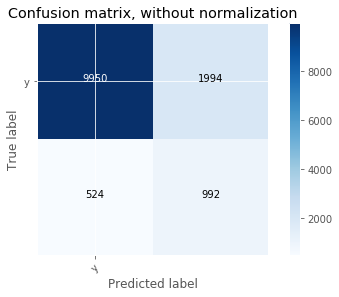

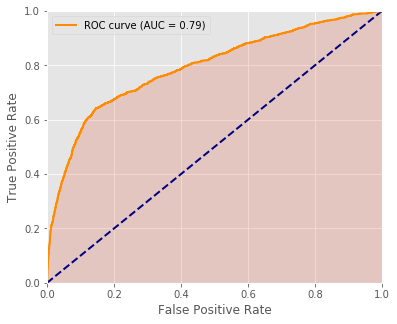

Average precision-recall score: 0.44


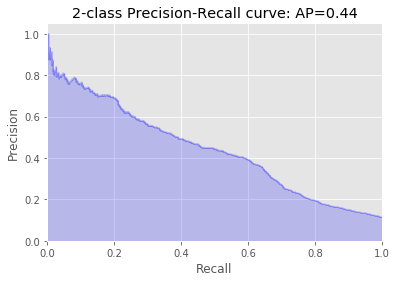

In [90]:
# LogisticRegression
lr_classifier = LogisticRegression(class_weight="balanced") # set class_weight to avoid unbalanced problem
lr_classifier.fit(X_train, Y_train)

Y_predict = lr_classifier.predict(X_test) # predict
Y_predict_prob = lr_classifier.predict_proba(X_test)[:,1]  # Return probability estimates

# Classification metrics
accuracy = metrics.accuracy_score(Y_test, Y_predict)    # accuracy
f1 = metrics.f1_score(Y_test, Y_predict, average=None)  # balanced F-score or F-measure

print('Accuracy: {0:0.2f}'.format(accuracy))
print('F1-score: ', end='')
print(['{0:0.2f}'.format(i) for i in f1])

# Compute confusion matrix and Plot non-normalized confusion matrix
cnf_matrix  = metrics.confusion_matrix(Y_test, Y_predict)
plot_confusion_matrix(cnf_matrix, classes='y', title='Confusion matrix, without normalization')

# For binary classification problem, we should use AUC-ROC and precision-recall to evaluate models
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_prob)
roc_auc = metrics.auc(fpr, tpr)   # Compute Area Under the Curve (AUC)
print('AUC: {0:0.2f}'.format(roc_auc))
plot_roc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_predict_prob)  
average_precision = metrics.average_precision_score(Y_test, Y_predict_prob)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
plot_prediction_recall(precision, recall)

Accuracy: 0.89
F1-score: ['0.94', '0.35']
AUC: 0.74


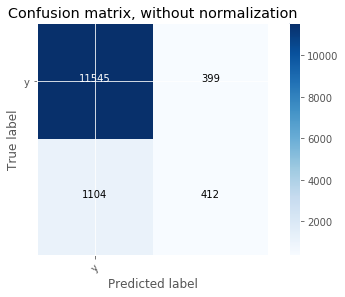

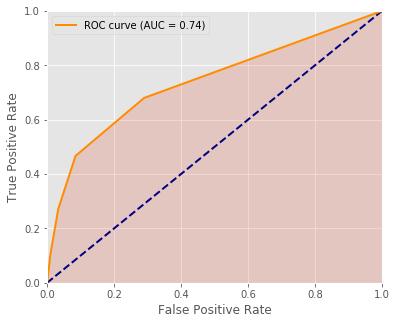

Average precision-recall score: 0.31


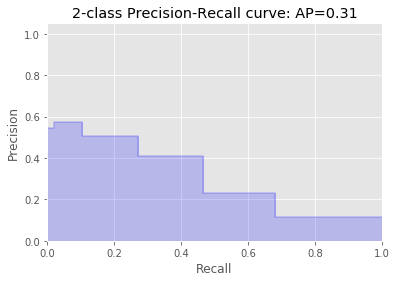

In [91]:
# KNN
knn_classifier = KNeighborsClassifier()  # use default k=5
knn_classifier.fit(X_train, Y_train)

Y_predict = knn_classifier.predict(X_test) # predict
Y_predict_prob = knn_classifier.predict_proba(X_test)[:,1]  # Return probability estimates

# Classification metrics
accuracy = metrics.accuracy_score(Y_test, Y_predict)    # accuracy
f1 = metrics.f1_score(Y_test, Y_predict, average=None)  # balanced F-score or F-measure

print('Accuracy: {0:0.2f}'.format(accuracy))
print('F1-score: ', end='')
print(['{0:0.2f}'.format(i) for i in f1])

# Compute confusion matrix and Plot non-normalized confusion matrix
cnf_matrix  = metrics.confusion_matrix(Y_test, Y_predict)
plot_confusion_matrix(cnf_matrix, classes='y', title='Confusion matrix, without normalization')

# For binary classification problem, we should use AUC-ROC and precision-recall to evaluate models
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_prob)
roc_auc = metrics.auc(fpr, tpr)   # Compute Area Under the Curve (AUC)
print('AUC: {0:0.2f}'.format(roc_auc))
plot_roc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_predict_prob)  
average_precision = metrics.average_precision_score(Y_test, Y_predict_prob)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
plot_prediction_recall(precision, recall)

In [93]:
# SVM
svm_classifier = SVC(kernel="sigmoid", class_weight = "balanced") # set class_weight to avoid unbalanced problem
svm_classifier.fit(X_train, Y_train)

Y_predict = svm_classifier.predict(X_test) # predict
Y_predict_prob = svm_classifier.predict_proba(X_test)[:,1]  # Return probability estimates

# Classification metrics
accuracy = metrics.accuracy_score(Y_test, Y_predict)    # accuracy
f1 = metrics.f1_score(Y_test, Y_predict, average=None)  # balanced F-score or F-measure

print('Accuracy: {0:0.2f}'.format(accuracy))
print('F1-score: ', end='')
print(['{0:0.2f}'.format(i) for i in f1])

# Compute confusion matrix and Plot non-normalized confusion matrix
cnf_matrix  = metrics.confusion_matrix(Y_test, Y_predict)
plot_confusion_matrix(cnf_matrix, classes='y', title='Confusion matrix, without normalization')

# For binary classification problem, we should use AUC-ROC and precision-recall to evaluate models
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_prob)
roc_auc = metrics.auc(fpr, tpr)   # Compute Area Under the Curve (AUC)
print('AUC: {0:0.2f}'.format(roc_auc))
plot_roc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_predict_prob)  
average_precision = metrics.average_precision_score(Y_test, Y_predict_prob)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
plot_prediction_recall(precision, recall)

AttributeError: predict_proba is not available when  probability=False

In summary, "SVM" needs quite a long time to train. "Random Forest" and "KNN" have simarity performance (their f-score and accuracy are both highest), while "Random Forest" has higher "AUC" than that of "KNN". We can choose "Random Forest" as final model.